In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../../src'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/home/enis/projects/nna/src


In [5]:
from pathlib import Path

# PARAMETERS
# when TEST_MODE is True: results are not saved
TEST_MODE=False
USERNAME = "EnisBerk"

RESULTS_DIR = Path("./resultsReal")


# has to be relative to where notebook server is running
SAMPLES_DIR = Path("/scratch/enis/data/nna/labeling/splits")

tags=["Songbird","Water Bird","Insect","Running Water","Rain","Cable","Wind","Vehicle","Aircraft"]


In [2]:
import ipywidgets as widgets
from IPython.display import Audio,display,HTML,clear_output

from labeling_utils import play_html_modify,save_to_csv,load_labels
from labeling_utils import labeling_UI
import pickle
from fileUtils import read_file_properties


In [3]:
!find ./resultsReal/ -iname ".csv" | xargs cat  | wc -l


0


In [7]:
UI=labeling_UI(tags,SAMPLES_DIR,USERNAME,RESULTS_DIR,TEST_MODE=TEST_MODE)



Output()

Text(value='', placeholder='Other tags (coma seperated)')

Button(description='Save', icon='check', style=ButtonStyle(), tooltip='Description')

Output()

In [4]:
# # this one shows also model suggested tags 
# AI_predicted_results_pkl = Path("/scratch/enis/data/nna/labeling/classifications_1000.pkl")
# LABELING_DIR= Path("/scratch/enis/data/nna/labeling")
# SAMPLES_DIR=Path(SAMPLES_DIR)
# file_properties,_ = read_file_properties( LABELING_DIR / "mp3files.txt")

# dbfile = open(AI_predicted_results_pkl, 'rb')  
# model_tags = pickle.load(dbfile) 
# dbfile.close() 
# tag_threshold=0.1

# UI=labeling_UI(tags,SAMPLES_DIR,USERNAME,RESULTS_DIR,TEST_MODE=TEST_MODE,model_tags=model_tags,tag_threshold=tag_threshold)


Output()

Output()

Button(description='Save', icon='check', style=ButtonStyle(), tooltip='Description')

Output()

## Experiments to find out threshold for clipping

In [3]:
clippingFile="/scratch/enis/data/nna/labeling/splits_real_clipping_1.pkl"
import numpy as np
clippingDict = np.load(clippingFile,allow_pickle=True)
clippingDict=clippingDict[()]

In [14]:
for fileName,clipping in clippingDict.items():
    print(fileName,clipping[0])
    break
    

/scratch/enis/data/nna/labeling/splits_real/S4A10209_20190505_011602_32m_6s__32m_16s.flac [0.3151875  0.61869375]


In [25]:
labeled="""\
S4A10268_20190520_131602_0m_34s__0m_44s.flac,Songbird,Water Bird
S4A10268_20190524_111602_52m_55s__53m_5s.flac,Clipping
S4A10293_20190527_231602_48m_52s__49m_2s.flac,Wind,Clipping
S4A10366_20190518_123000_10m_58s__11m_8s.flac,Clipping
S4A10264_20190523_211602_5m_56s__6m_6s.flac,Water Bird,Running Water
S4A10276_20190606_191602_18m_47s__18m_57s.flac,Clipping
S4A10361_20190511_081602_6m_55s__7m_5s.flac,Clipping
S4A10297_20190511_153000_72m_28s__72m_38s.flac,Rain,Wind,Clipping, drop on metal
S4A10284_20190608_063000_55m_19s__55m_29s.flac,Songbird,Songbird+++
S4A10268_20190616_084602_14m_2s__14m_12s.flac,Songbird,Water Bird,Rain,Static
S4A10322_20190601_061602_45m_51s__46m_1s.flac,Clipping+++
S4A10298_20190606_134602_67m_59s__68m_9s.flac,Clipping++++
S4A10238_20190522_161602_52m_16s__52m_26s.flac,Songbird
S4A10273_20190519_221602_25m_8s__25m_18s.flac,Songbird,Wind,Clipping+
S4A10327_20190526_033000_29m_17s__29m_27s.flac,Songbird,Water Bird,Frog
S4A10327_20190606_131602_27m_58s__28m_8s.flac,Wind,Clipping+
S4A10245_20190610_100000_31m_40s__31m_50s.flac,Songbird,Wind,Clipping+
S4A10243_20190526_033000_45m_17s__45m_27s.flac,Songbird,Wind
S4A10288_20190525_143000_2m_27s__2m_37s.flac,Songbird
S4A10283_20190522_013000_67m_43s__67m_53s.flac,Songbird,Water Bird
S4A10268_20190522_013000_11m_15s__11m_25s.flac,Water Bird,Wind
S4A10255_20190526_224602_28m_21s__28m_31s.flac,Clipping+++++
S4A10261_20190616_073000_37m_55s__38m_5s.flac,Songbird,Wind
S4A10298_20190506_000000_50m_51s__51m_1s.flac,Clipping+++++
S4A10262_20190529_203000_26m_32s__26m_42s.flac,Clipping+++++
S4A10261_20190510_131602_71m_18s__71m_28s.flac,Clipping+++++
S4A10288_20190507_104602_68m_36s__68m_46s.flac,Rain,Wind
S4A10298_20190607_213000_68m_42s__68m_52s.flac,Songbird,Wind,Clipping+
S4A10243_20190613_004602_8m_14s__8m_24s.flac,Water Bird,Wind
S4A10295_20190527_094602_37m_10s__37m_20s.flac,Clipping+++++
S4A10288_20190518_223000_52m_14s__52m_24s.flac,Wind,Clipping++++
S4A10245_20190527_134602_11m_28s__11m_38s.flac,Wind,Clipping++++
S4A10261_20190616_220000_49m_11s__49m_21s.flac,Wind,Clipping+++++, metal moving around
S4A10280_20190525_093000_47m_53s__48m_3s.flac,Songbird,Water Bird,Insect,Aircraft
S4A10238_20190531_161602_58m_58s__59m_8s.flac,Clipping+++++
S4A10297_20190518_034602_71m_21s__71m_31s.flac,Wind,Clipping+
S4A10261_20190528_091602_23m_16s__23m_26s.flac,Songbird,Wind,Clipping+
S4A10290_20190510_214602_52m_27s__52m_37s.flac,Clipping+++++
S4A10275_20190621_054602_71m_45s__71m_55s.flac,Songbird,Water Bird
S4A10327_20190519_081602_37m_16s__37m_26s.flac,Songbird,Clipping++
S4A10238_20190507_130000_65m_50s__66m_0s.flac,Wind,Aircraft
S4A10322_20190511_071602_58m_30s__58m_40s.flac,Rain
S4A10293_20190508_030000_74m_38s__74m_48s.flac,Rain,Wind
S4A10298_20190509_220000_14m_19s__14m_29s.flac,Wind,Clipping+++
S4A10272_20190527_030000_58m_21s__58m_31s.flac,Songbird,Wind,Clipping++++
S4A10361_20190621_011602_12m_16s__12m_26s.flac,Songbird,Insect
S4A10288_20190514_010000_21m_21s__21m_31s.flac,Clipping++++
S4A10245_20190516_001602_36m_37s__36m_47s.flac,Clipping+++++
S4A10276_20190607_080000_40m_16s__40m_26s.flac,Songbird,Water Bird,Wind,Clipping+++
S4A10322_20190617_143000_11m_44s__11m_54s.flac,Songbird,Wind,Clipping++++\
"""
labeled=labeled.split("\n")

In [44]:
thePath="/scratch/enis/data/nna/labeling/splits_real/"
toSorted=[]
for l in labeled:
#     if "Clipping" in l:
    k=l.split(",")[0]
    left,right=clippingDict[thePath+k][0]
    toSorted.append((left,right,l))
#         print(l.split(",")[1:],left,right)
toSorted.sort()

In [50]:
# for i in toSorted:
#     print(i[0:2],i[2].split(",")[1:])

In [52]:
from fileUtils import list_files 

listOfFiles=list_files("/scratch/enis/data/nna/labeling/splits_real")

clippingFile="/scratch/enis/data/nna/labeling/splits_real_clipping_1.pkl"
thePath="/scratch/enis/data/nna/labeling/splits_real/"

import numpy as np
clippingDict = np.load(clippingFile,allow_pickle=True)
clippingDict=clippingDict[()]

clippingThreshold=0.4
goodOnes=[]
for f in fileList:
    left,right=clippingDict[thePath+k]
    maxValue=max(left,right)
    if maxValue>=clippingThreshold:
        goodOnes.append(f)

print(len(goodOnes))
    

ModuleNotFoundError: No module named 'fileUtils'

In [8]:
%%time

import librosa as librosa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa.display

CPU times: user 1.72 s, sys: 364 ms, total: 2.08 s
Wall time: 6.12 s


In [11]:
%%time

y, sr = librosa.load("/scratch/enis/data/nna/labeling/splitsv3NoClipping04/INP-AR-01_20180509_000000_3m_51s__4m_1s.flac")


CPU times: user 372 ms, sys: 0 ns, total: 372 ms
Wall time: 455 ms


CPU times: user 10.1 s, sys: 1.52 s, total: 11.6 s
Wall time: 295 ms


(<Figure size 1296x1152 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f45baee4d30>)

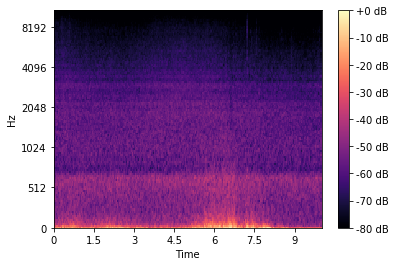

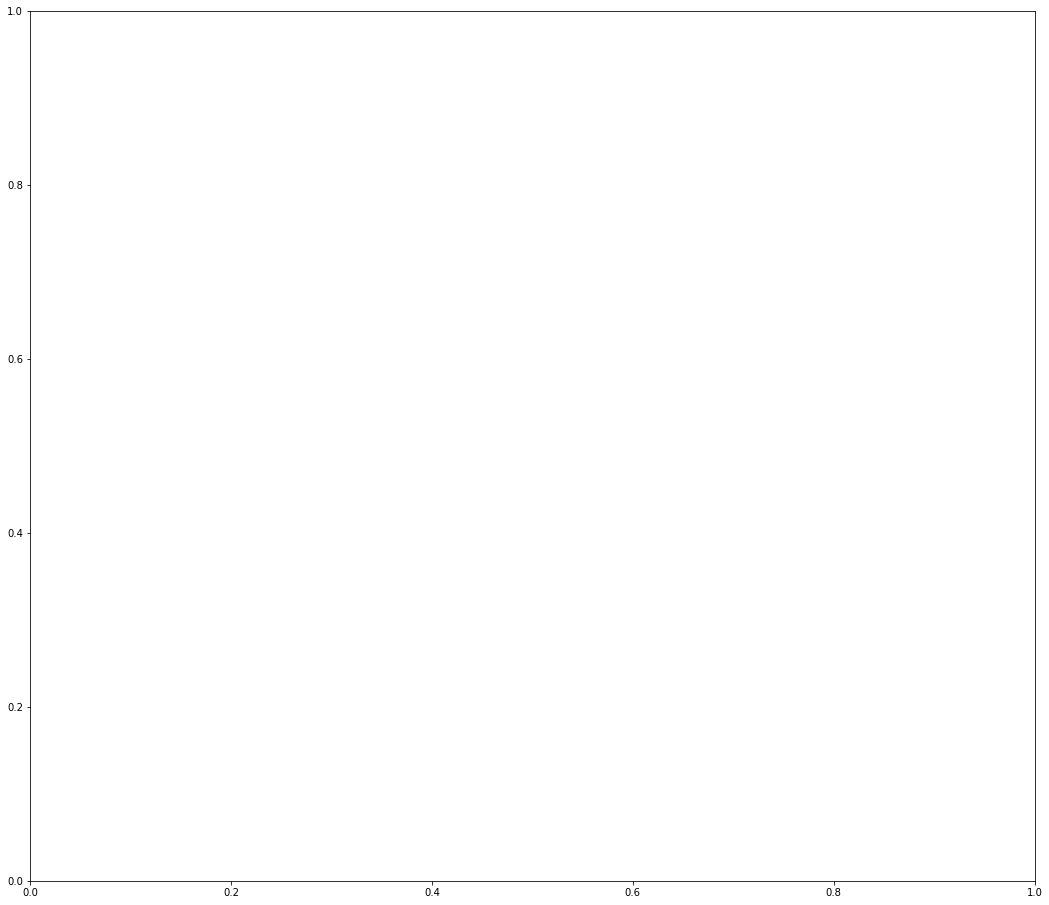

In [16]:
%%time

S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.power_to_db(S, ref=np.max)

fig, ax = plt.subplots()
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel',);
plt.colorbar(format='%+2.0f dB');
plt.subplots(figsize=(18, 16))


img = librosa.display.specshow(S_db, ax=ax)
fig.colorbar(img, ax=ax)

In [7]:
%%time
print("test")

test
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 105 µs


In [ ]:
# Size of the FFT, which will also be used as the window length
n_fft=2048

# Step or stride between windows. If the step is smaller than the window lenght, the windows will overlap
hop_length=512

# Load sample audio file
y, sr = librosa.load(librosa.util.example_audio_file())

# Calculate the spectrogram as the square of the complex magnitude of the STFT
spectrogram_librosa = np.abs(librosa.stft(
    y, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window='hann')) ** 2